In [171]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

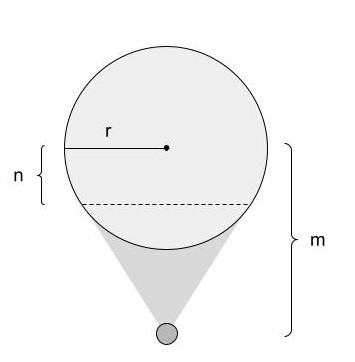

Plane of occlusion offset (relative to center of circular object) as a function of object radius, r, and distance from object center, m:

$$ n = r(1-cos(sin^{-1}(\frac{r}{m}))) $$

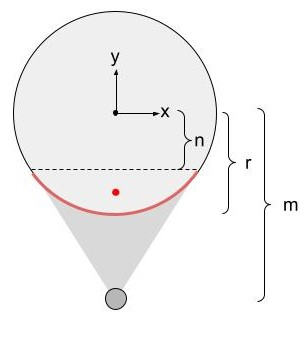

Calculating the mean location (drawn as red dot) of all points lying on the visible surface (red arc):

$$ \mu = [\mu_x, \mu_y ] $$

If reference frame is centered below object:

$$ \mu_{x} = 0 $$

<!-- ## Wrong

Use equation for semicircle to get vertical component: 
$$ y = \sqrt{r^2 - x^2} $$

$$ \mu_{y} = \frac{1}{|x_{y = r} - x_{y = n}|} \int _{x_{y = r}} ^{x_{y = n}} \sqrt{r^2 - x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \int ^{\sqrt{r^2 - n^2}} _{0} \sqrt{r^2 -x^2} dx $$ 

$$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} x \sqrt{r^2 - x^2} + r^2 sin^{-1} \bigg(\frac{x}{r} \bigg) \bigg] \bigg\rvert^{\sqrt{r^2 - n^2}}_{0} $$ 
-->
<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + tan^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{\sqrt{2r^2 - n^2}} \bigg) \bigg]  $$ -->

<!-- $$  = \frac{1}{\sqrt{r^2 - n^2}} \bigg[ \frac{1}{2} n \sqrt{r^2 - n^2} + (r^2 - n^2) sin^{-1} \bigg(\frac{\sqrt{r^2 - n^2}}{r} \bigg) \bigg]  $$ -->



Calculate the centroid:

<!-- $$ \mu_y = \frac{ \int _{n} ^{r} 2xy dy}{Segment Area} $$  -->


$$ \mu_y = \frac{\int _{n} ^{r} 2y \sqrt{r^2 - y^2} dy}{Segment Area} $$


<!-- $$ \mu_y = \frac{ \frac{-2}{3} \bigg{(}r^2 - y^2\bigg{)}^{\frac{3}{2}}  \bigg\rvert^{r}_{r*cos(tan^{-1}(\frac{n}{r}))}} { \bigg{(}\frac{\pi}{2}-tan^{-1}(\frac{n}{r}) \bigg{)} - \bigg{(}n*r*cos(tan^{-1}(\frac{n}{r}))\bigg{)} } $$ -->

$$ \mu_y = \frac{ \frac{-2}{3} \bigg{(}r^2 - y^2\bigg{)}^{\frac{3}{2}}  \bigg\rvert^{r}_{n}} { ( \phi r^2 ) - ( nr*sin(\phi) ) }, \phi = \frac{\pi}{2}-sin^{-1} \bigg{(} \frac{n}{r} \bigg{)} $$

Calculate the average y-coordinate on the arc:

$$ \mu_{y} = \frac{1}{\sqrt{r^2-n^2}} \int_0^{\sqrt{r^2-n^2}} \sqrt{r^2 - x^2} dx $$ 


$$  = \frac{1}{\sqrt{r^2 - n^2}} \frac{1}{2} \bigg[  x \sqrt{r^2 - x^2} + r^2 sin^{-1} \bigg(\frac{x}{r} \bigg) \bigg] \bigg\rvert^{\sqrt{r^2 - n^2}}_{0} $$ 

In [369]:
def get_n(m, r):
    """calculates plane of occlusion offset as a function of cicrular object radius 
    and distance from object center"""
    n = r*(1-np.cos(np.arcsin(r/m))) #CORRECT
#     n = r*(np.cos(np.arcsin(r/m)))
    return n
    
def get_mu(m,r):
    """returns offset between circular object center and observed distribution center"""
    n = get_n(m,r)
    phi = (np.pi/2) - np.arcsin(n/r)
    print("phi", phi)

#     # Centroid ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#     # area = area of pizza slice - area of triangle
#     area = (phi * r**2) - ( n*r*np.sin(phi)) #CORRECT
#     mu_y = ((-2/3)*(r**2 - n**2)**(3/2))/ area 
#     #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    #mean y value ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    x = np.sqrt(r**2 - n**2)
    high = -(1/np.sqrt(r**2 - n**2)) *(0.5*(x*np.sqrt(r**2 - x**2) + (r**2)*np.arcsin(x/r)))
    x = 0
    low = (1/np.sqrt(r**2 - n**2)) *(0.5*(x*np.sqrt(r**2 - x**2) + (r**2)*np.arcsin(x/r)))
    mu_y = high - low
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    mu_x = 0.0
    mu = np.array([[mu_x, mu_y]])
    return mu, phi
    

Plane of occlusion offset: 0.5834022095494691
phi 0.947884940192397
Distribution center: [[ 0.        -0.8752423]]


<IPython.core.display.Javascript object>


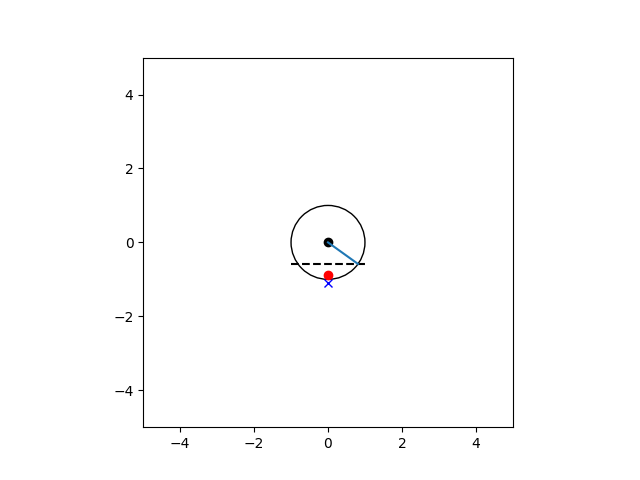

In [370]:
r = 1 #object radius
m = 1.1 #distance from object center
n = get_n(m,r) #plane of occlusion offset
print("Plane of occlusion offset:", n)

mu, phi = get_mu(m,r)
print("Distribution center:", mu)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
circle = plt.Circle((0,0),r, fill = False)
ax.add_patch(circle)

ax.plot(0, -m, 'bx')
# ax.plot([-r,r], [0, 0], 'k-')
ax.plot(0,0,'ko')
ax.plot([-r,r], [-n, -n], 'k--')
ax.plot(mu[0,0], mu[0,1], 'ro')

ax.plot([0,r*np.sin(phi)],[0,-r*np.cos(phi)])


[ 0.00374151 -0.78383052]
[-0.04758794 -0.642724  ]


<IPython.core.display.Javascript object>


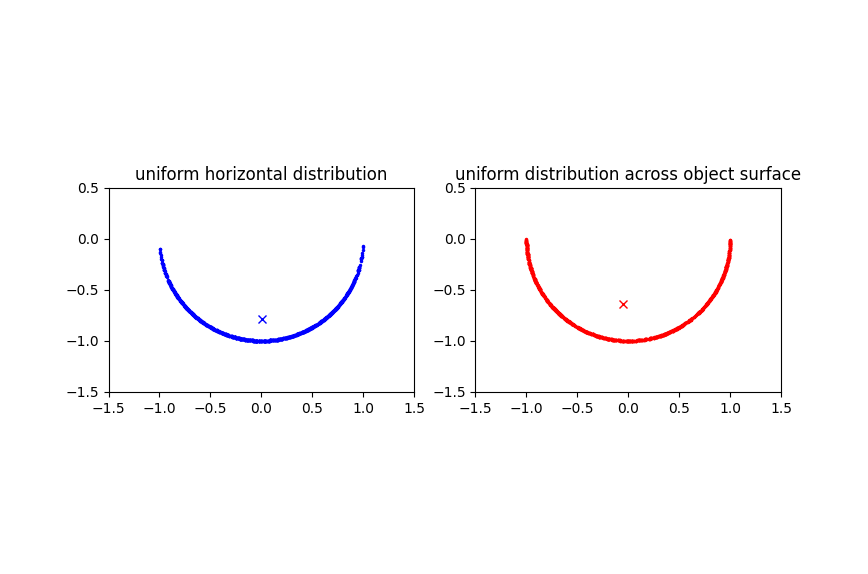

In [371]:
#verify numerically that get_mu is working correctly

rad = 1
npts = 1000

# #Uniform spread of NORMALS from OBSERVER POV  ~~~~~~~~~~~~~~~~~~~~~
x = 2*rad*np.random.rand(npts) - rad
y = -np.sqrt(rad**2 - x**2)
pts1 = np.array([x, y]).T

#move occlusion plane
# pts1 = pts1[pts1[:,1] < -.5834]

mu1 = np.mean(pts1, axis = 0)
print(mu1)
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Uniform spread about SURFACE OF ARC ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
roll = np.pi*np.random.rand(npts) + np.pi/2
pts2 = np.array([rad*np.sin(roll), rad*np.cos(roll)]).T

#move occlusion plane
# pts2 = pts2[pts2[:,1] < -.5834]

mu2 = np.mean(pts2, axis = 0)
print(mu2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

fig, ax = plt.subplots(1,2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_xlim([-1.5,1.5])
ax[1].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,0.5])
ax[1].set_ylim([-1.5,0.5])

ax[0].set_title("uniform horizontal distribution")
ax[1].set_title("uniform distribution across object surface")
ax[0].plot(pts1[:,0],pts1[:,1], 'b.', ms = 3)
ax[1].plot(pts2[:,0] ,pts2[:,1], 'r.', ms = 3)

ax[0].plot(mu1[0],mu1[1], 'bx')
ax[1].plot(mu2[0],mu2[1], 'rx')

# Notes

Is my method of integration not sampling evenly???

Use 3rd moment of each distribution to determine how circular each shape is